In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression


In [4]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shrut\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [6]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [8]:
#data preprocessing
df_train=pd.read_csv("C:/Users/shrut/OneDrive/Desktop/datasets/train.csv")

In [10]:
df_train.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [11]:
df_train.shape

(20800, 5)

In [12]:
df_train.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [17]:
df_train =df_train.dropna()

In [18]:
df_train.isnull().sum()

id        0
title     0
author    0
text      0
label     0
dtype: int64

In [20]:
df_train.shape

(18285, 5)

In [21]:
df_train['content']=df_train['author']+' '+df_train['title']

C:\Users\shrut\AppData\Local\Temp\ipykernel_4912\2330675137.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['content']=df_train['author']+' '+df_train['title']


In [22]:
df_train.head()

,id,title,author,text,label,content
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,Darrell Lucus House Dem Aide: We Didn’t Even S...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,"Daniel J. Flynn FLYNN: Hillary Clinton, Big Wo..."
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,Consortiumnews.com Why the Truth Might Get You...
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,Jessica Purkiss 15 Civilians Killed In Single ...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,Howard Portnoy Iranian woman jailed for fictio...


In [23]:
x = df_train.drop(columns='label' , axis=1)
y = df_train['label']

In [24]:
print(x)
print(y)

          id                                              title  \
0          0  House Dem Aide: We Didn’t Even See Comey’s Let...   
1          1  FLYNN: Hillary Clinton, Big Woman on Campus - ...   
2          2                  Why the Truth Might Get You Fired   
3          3  15 Civilians Killed In Single US Airstrike Hav...   
4          4  Iranian woman jailed for fictional unpublished...   
...      ...                                                ...   
20795  20795  Rapper T.I.: Trump a ’Poster Child For White S...   
20796  20796  N.F.L. Playoffs: Schedule, Matchups and Odds -...   
20797  20797  Macy’s Is Said to Receive Takeover Approach by...   
20798  20798  NATO, Russia To Hold Parallel Exercises In Bal...   
20799  20799                          What Keeps the F-35 Alive   

                                          author  \
0                                  Darrell Lucus   
1                                Daniel J. Flynn   
2                             Consortiu

In [25]:
port_stem=PorterStemmer()
    

In [26]:
def stemming(content):
    stemmed_content=re.sub('[^a-zA-Z]',' ',content)
    stemmed_content=stemmed_content.lower()
    stemmed_content=stemmed_content.split()
    stemmed_content=[port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')] 
    stemmed_content= ' '.join(stemmed_content)
    return stemmed_content
                           

In [28]:
df_train['content']=df_train['content'].apply(stemming)
df_train['content']

C:\Users\shrut\AppData\Local\Temp\ipykernel_4912\3365296120.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['content']=df_train['content'].apply(stemming)


0        darrel lucu hous dem aid even see comey letter...
1        daniel j flynn flynn hillari clinton big woman...
2                   consortiumnew com truth might get fire
3        jessica purkiss civilian kill singl us airstri...
4        howard portnoy iranian woman jail fiction unpu...
                               ...                        
20795    jerom hudson rapper trump poster child white s...
20796    benjamin hoffman n f l playoff schedul matchup...
20797    michael j de la merc rachel abram maci said re...
20798    alex ansari nato russia hold parallel exercis ...
20799                            david swanson keep f aliv
Name: content, Length: 18285, dtype: object

In [29]:
x =df_train['content'].values
y = df_train['label']

In [32]:
vectorizer= TfidfVectorizer()
vectorizer.fit(x)

x=vectorizer.transform(x)

In [34]:
print(x)

  (0, 14636)	0.2853880981846006
  (0, 12574)	0.25566372256502734
  (0, 8316)	0.3609049070394367
  (0, 8054)	0.29347549279156676
  (0, 7196)	0.24556189342497173
  (0, 6559)	0.21745594418933306
  (0, 4642)	0.23016077319140021
  (0, 3545)	0.2684494960336511
  (0, 3361)	0.3609049070394367
  (0, 2759)	0.2466340295002162
  (0, 2313)	0.3745612250433202
  (0, 247)	0.26982554594264346
  (1, 15674)	0.3053027963338981
  (1, 6384)	0.19285723710368197
  (1, 5146)	0.7119376870709988
  (1, 3330)	0.2623789770430963
  (1, 2621)	0.19368327535633711
  (1, 2066)	0.38191890436039194
  (1, 1764)	0.1509985164277699
  (1, 1391)	0.29617980713962144
  (2, 14570)	0.4180284001448272
  (2, 8978)	0.4948460479407663
  (2, 5585)	0.3490632212946542
  (2, 5037)	0.38709995799949964
  (2, 2897)	0.4581003415623782
  :	:
  (18282, 12245)	0.252743907968046
  (18282, 11521)	0.2748252773264482
  (18282, 11327)	0.24588400571511215
  (18282, 9610)	0.07665665104558947
  (18282, 8947)	0.1712955017712004
  (18282, 8884)	0.29296479

In [36]:
x_train , x_test,y_train , y_test= train_test_split(x , y , test_size=0.2 ,stratify=y, random_state=2)

In [37]:
x_train.shape , x_test.shape,y_train.shape , y_test.shape

((14628, 15971), (3657, 15971), (14628,), (3657,))

In [40]:
algo = LogisticRegression()

In [41]:
algo.fit(x_train , y_train)

LogisticRegression()

In [42]:
y_predict=algo.predict(x_test)

In [46]:
train_accuracy=algo.score(x_train , y_train)
print("train_accuracy : ",train_accuracy)

train_accuracy :  0.9901558654634947


In [45]:
test_accuracy=algo.score(x_test , y_test)
print("test_accuracy : " , test_accuracy)

test_accuracy :  0.9827727645611156


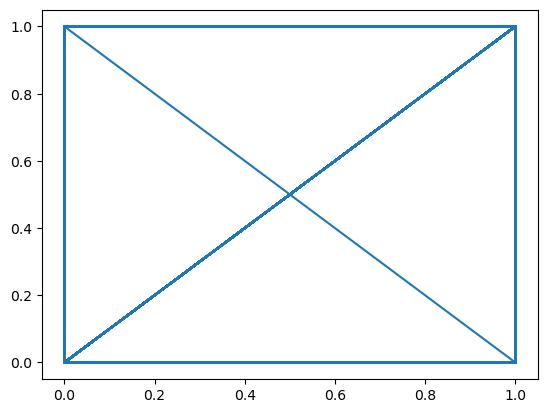

In [47]:
import matplotlib.pyplot as plt
plt.plot(y_predict , y_test)

In [69]:
x_new=x_test[18]
prediction = algo.predict(x_new)
print(prediction)

if(prediction[0]==0):
    print("the news is real")
else:
    print("the news is fake")
    

[0]
the news is real


In [68]:
print(y_test[18])

1
